In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv("delivery_time.csv")
#df.head()
df1=pd.Series(df["Sorting Time"])
df2=pd.Series(df["Delivery Time"])
#df3=pd.merge(df1,df2,left_index=True,right_index=True)
df4=pd.DataFrame({"SortingTime":df1,"DeliveryTime":df2})
df4.head()

,SortingTime,DeliveryTime
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00


In [6]:
df4.describe()

,SortingTime,DeliveryTime
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


<AxesSubplot:>

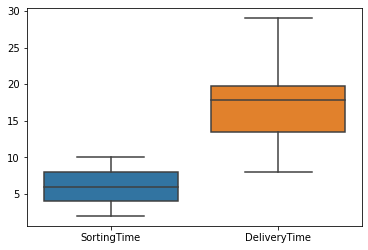

In [7]:
sns.boxplot(data=df4)

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

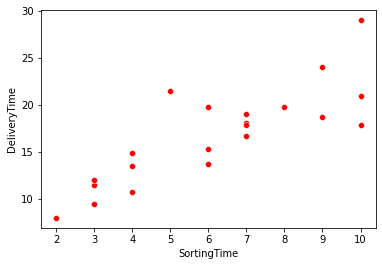

In [8]:
sns.scatterplot(x=df4["SortingTime"],y=df4["DeliveryTime"],color='red')

In [9]:
df4.corr()

,SortingTime,DeliveryTime
SortingTime,1.000000,0.825997
DeliveryTime,0.825997,1.000000


In [10]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime ~ SortingTime",data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 20 May 2022   Prob (F-statistic):           3.98e-06
Time:                        11:07:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
pred=model.predict(df4.iloc[:,0])
#df4["pred"]=pred
rmse=np.sqrt(np.mean((np.array(df4["DeliveryTime"])-np.array(pred))**2))
rmse

2.7916503270617654

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

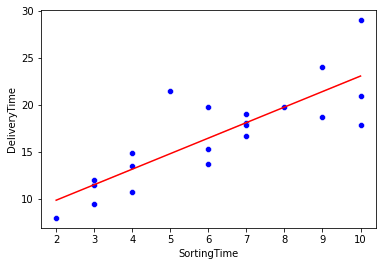

In [15]:
sns.scatterplot(x=df4["SortingTime"],y=df4["DeliveryTime"],color='blue')
sns.lineplot(x=df4["SortingTime"],y=pred, color='red')

# TRANSFORMATION TECHNIQUES

LOG TRANSFORMATION

In [18]:
model2 = smf.ols('DeliveryTime~np.log(SortingTime)',data=df4).fit()
model2.params
model2.resid 
model2.resid_pearson
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.64e-06
Time:                        11:10:32   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pred2=model2.predict(df4.iloc[:,0])

In [20]:
rmse2=np.sqrt(np.mean((np.array(df4["DeliveryTime"])-np.array(pred2))**2))
rmse2

2.733171476682066

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

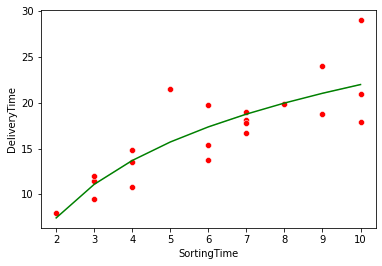

In [21]:
sns.scatterplot(x=df4["SortingTime"],y=df4["DeliveryTime"],color='red')
sns.lineplot(x=df4["SortingTime"],y=pred2, color='green')

EXPONENTIAL TRANSFORMATION

In [22]:
model3 = smf.ols('np.log(DeliveryTime)~SortingTime',data=df4).fit()
model3.params
model3.resid 
model3.resid_pearson
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Fri, 20 May 2022   Prob (F-statistic):           1.59e-06
Time:                          11:11:15   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pred_log=model3.predict(df4.iloc[:,0])

In [24]:
pred3=np.exp(pred_log)

In [25]:
rmse3=np.sqrt(np.mean((np.array(df4["DeliveryTime"])-np.array(pred3))**2))
rmse3

2.940250323056201

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

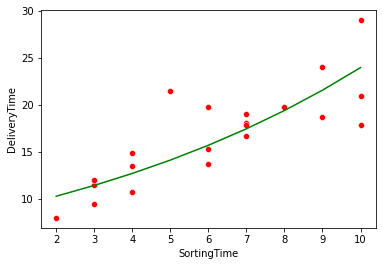

In [26]:
sns.scatterplot(x=df4["SortingTime"],y=df4["DeliveryTime"],color='red')
sns.lineplot(x=df4["SortingTime"],y=pred3, color='green')

QUAD TRANSFORMATION

In [30]:
df4["SortingTime_sq"] = df4["SortingTime"]**2
df4.head()

,SortingTime,DeliveryTime,SortingTime_sq
0,10,21.00,100
1,4,13.50,16
2,6,19.75,36
3,9,24.00,81
4,10,29.00,100


In [29]:
model4 = smf.ols('np.log(DeliveryTime)~SortingTime+SortingTime_sq',data=df4).fit()
model4.params
model4.resid 
model4.resid_pearson
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Fri, 20 May 2022   Prob (F-statistic):           2.20e-06
Time:                          11:11:44   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred_quad=model4.predict(df4)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back

In [32]:
rmse4=np.sqrt(np.mean((np.array(df4["DeliveryTime"])-np.array(pred4))**2))
rmse4

2.799041988740925

In [35]:
df5=pd.DataFrame({"Model":["model","log","exp","quad"],
                  "Accuracy":[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared],
                   "RMSE":[rmse,rmse2,rmse3,rmse4]})
df5

,Model,Accuracy,RMSE
0,model,0.682271,2.791650
1,log,0.695443,2.733171
2,exp,0.710948,2.940250
3,quad,0.764867,2.799042
